In [45]:
# ==========================================
# ShipmentSure: Predicting On-Time Delivery
# ========================================            

# Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [46]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score, StratifiedKFold

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline

from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier


In [47]:
from xgboost import XGBClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    classification_report, roc_auc_score, roc_curve, auc
)

In [48]:
df = pd.read_csv("dataset.csv")
df.head()


,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


In [50]:
df.shape

(10999, 12)

In [51]:
print(" First 5 rows of the dataset:")
print(df.head())

 First 5 rows of the dataset:
   ID Warehouse_block Mode_of_Shipment  Customer_care_calls  Customer_rating  \
0   1               D           Flight                    4                2   
1   2               F           Flight                    4                5   
2   3               A           Flight                    2                2   
3   4               B           Flight                    3                3   
4   5               C           Flight                    2                2   

   Cost_of_the_Product  Prior_purchases Product_importance Gender  \
0                  177                3                low      F   
1                  216                2                low      M   
2                  183                4                low      M   
3                  176                4             medium      M   
4                  184                3             medium      F   

   Discount_offered  Weight_in_gms  Reached.on.Time_Y.N  
0               

In [52]:
print("\n🔹 Column Datatypes:")
print(df.dtypes)


🔹 Column Datatypes:
ID                      int64
Warehouse_block        object
Mode_of_Shipment       object
Customer_care_calls     int64
Customer_rating         int64
Cost_of_the_Product     int64
Prior_purchases         int64
Product_importance     object
Gender                 object
Discount_offered        int64
Weight_in_gms           int64
Reached.on.Time_Y.N     int64
dtype: object


In [53]:
categorical = df.select_dtypes(include=["object"]).columns.tolist()
numerical = df.select_dtypes(include=["int64", "float64"]).columns.tolist()

In [54]:

print("Categorical Features:", categorical)
print("Numerical Features:", numerical)


Categorical Features: ['Warehouse_block', 'Mode_of_Shipment', 'Product_importance', 'Gender']
Numerical Features: ['ID', 'Customer_care_calls', 'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases', 'Discount_offered', 'Weight_in_gms', 'Reached.on.Time_Y.N']


In [55]:
print(" Null Values in Dataset:")
print(df.isnull().sum())

 Null Values in Dataset:
ID                     0
Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64


In [56]:
df.columns.tolist()

['ID',
 'Warehouse_block',
 'Mode_of_Shipment',
 'Customer_care_calls',
 'Customer_rating',
 'Cost_of_the_Product',
 'Prior_purchases',
 'Product_importance',
 'Gender',
 'Discount_offered',
 'Weight_in_gms',
 'Reached.on.Time_Y.N']

In [57]:
df.nunique()

ID                     10999
Warehouse_block            5
Mode_of_Shipment           3
Customer_care_calls        6
Customer_rating            5
Cost_of_the_Product      215
Prior_purchases            8
Product_importance         3
Gender                     2
Discount_offered          65
Weight_in_gms           4034
Reached.on.Time_Y.N        2
dtype: int64

In [58]:
duplicates = df.duplicated().sum()
print("Number of duplicate rows:", duplicates)

data = df.drop_duplicates()

Number of duplicate rows: 0


In [59]:
counts = df['Reached.on.Time_Y.N'].value_counts()
print(counts)

Reached.on.Time_Y.N
1    6563
0    4436
Name: count, dtype: int64


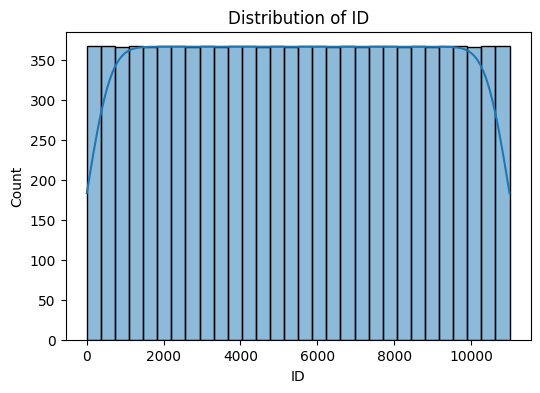

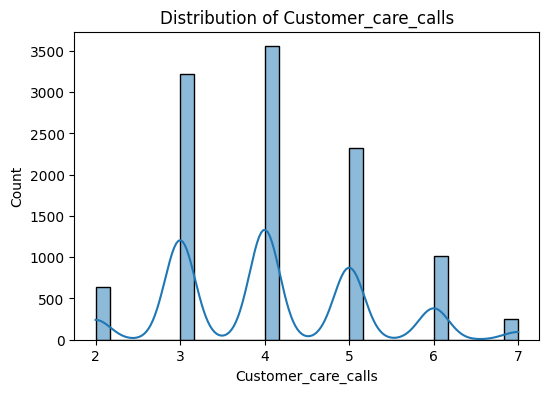

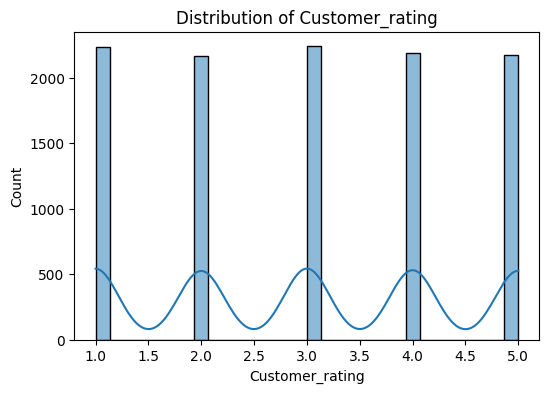

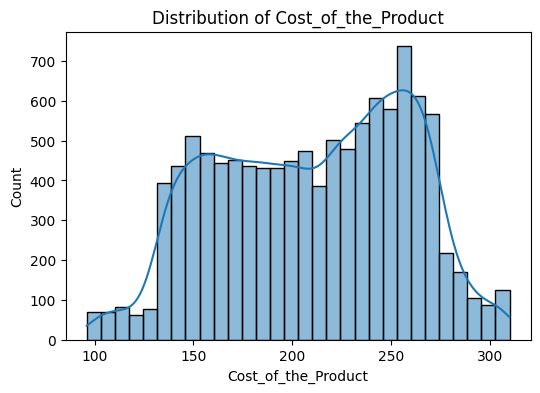

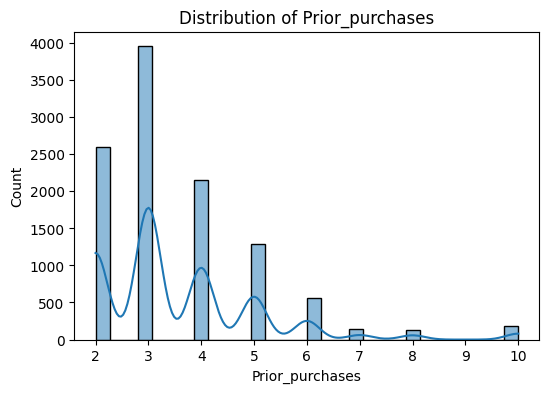

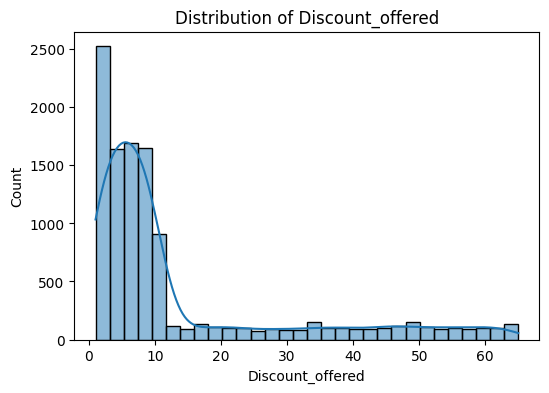

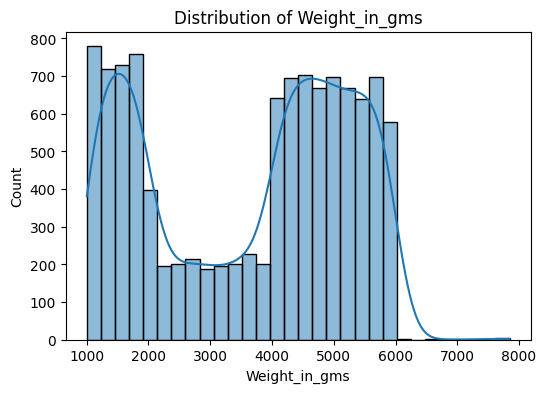

In [60]:
num_cols = df.select_dtypes(include=["int64", "float64"]).columns.tolist()
num_cols.remove("Reached.on.Time_Y.N")  # exclude target

for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")
    plt.show()

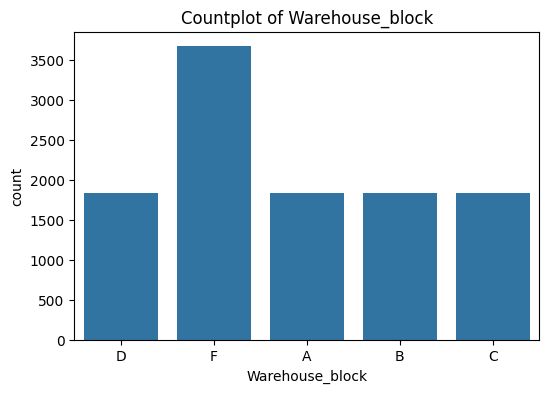

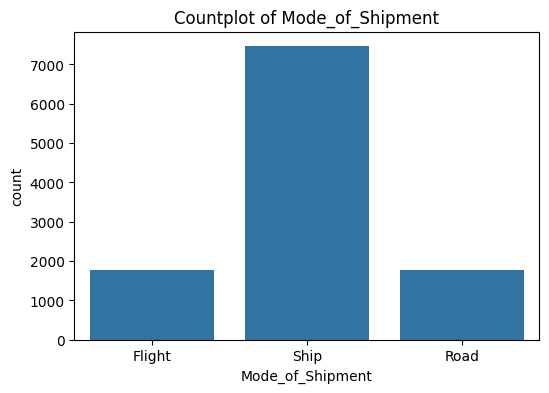

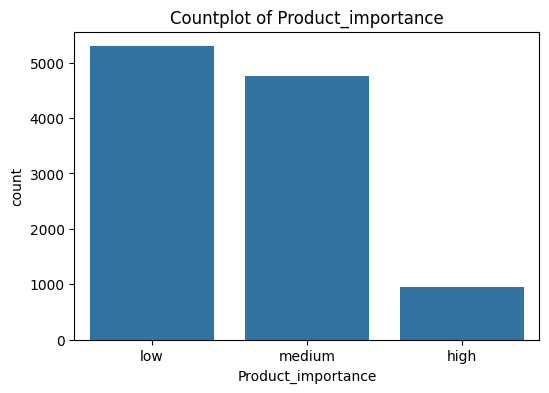

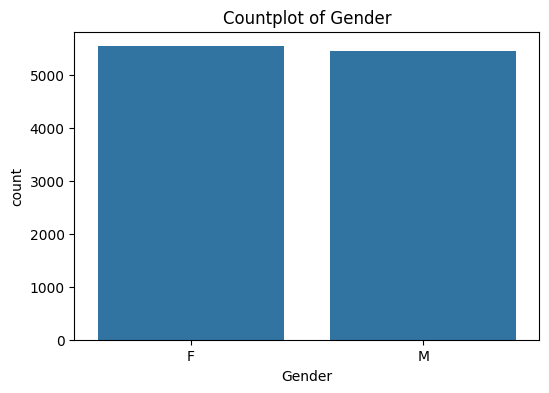

In [61]:
cat_cols = df.select_dtypes(include=["object"]).columns.tolist()

for col in cat_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(x=df[col])
    plt.title(f"Countplot of {col}")
    plt.show()


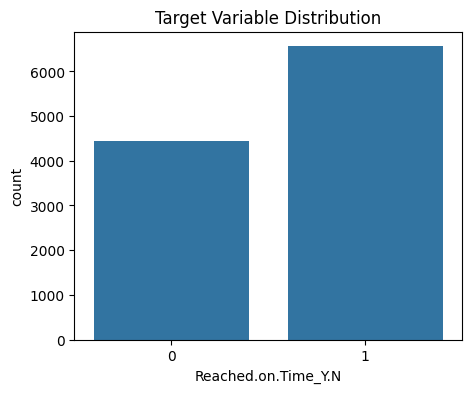

In [62]:
# 3. Target Variable Distribution
plt.figure(figsize=(5,4))
sns.countplot(x=df["Reached.on.Time_Y.N"])
plt.title("Target Variable Distribution")
plt.show()

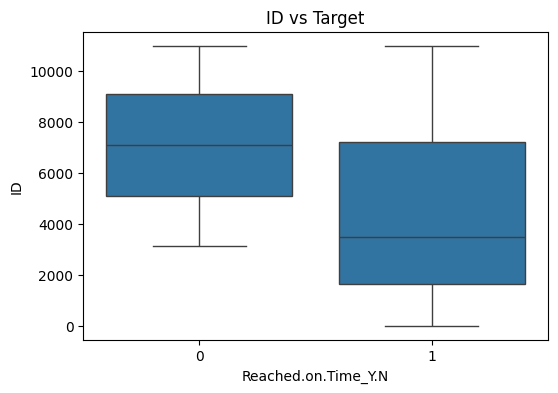

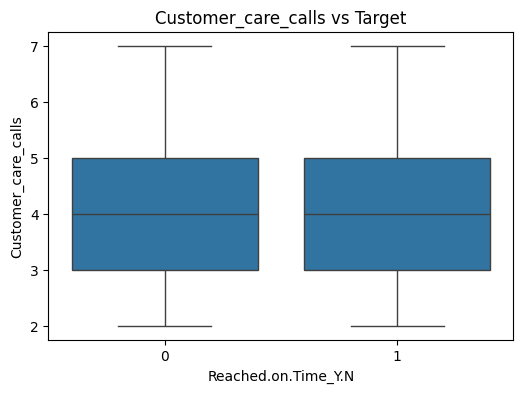

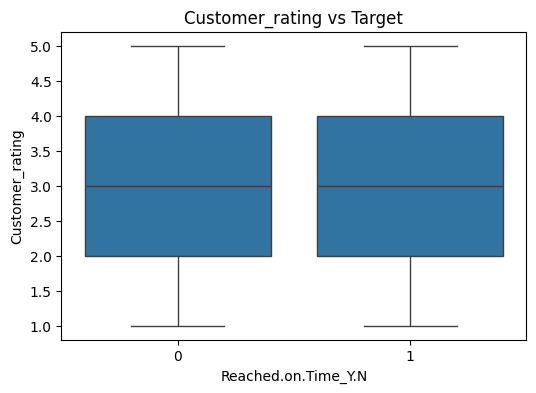

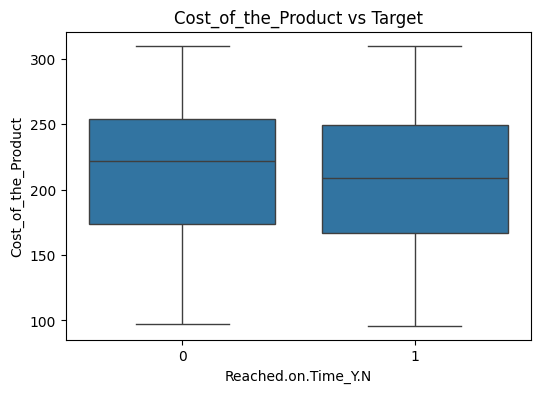

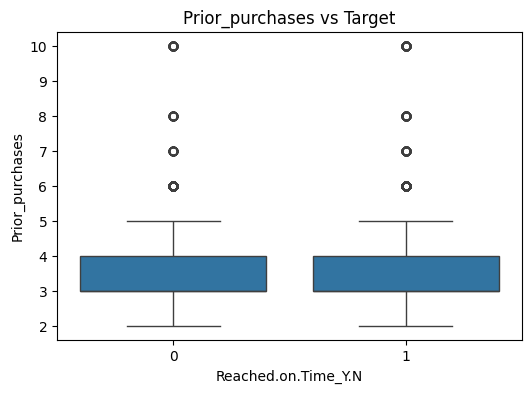

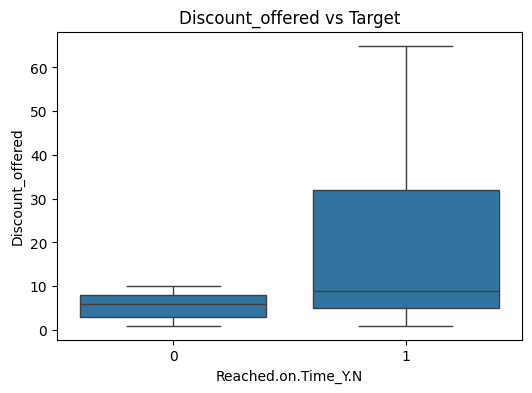

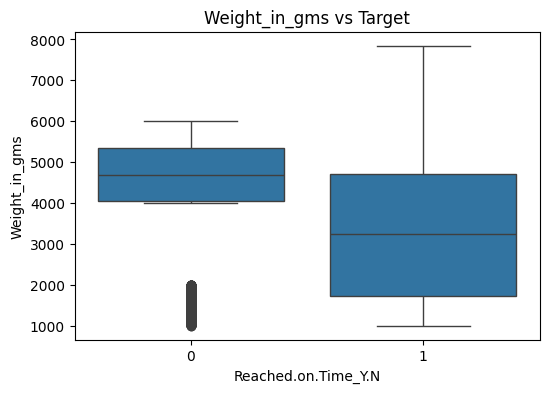

In [63]:
for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x="Reached.on.Time_Y.N", y=df[col], data=df)
    plt.title(f"{col} vs Target")
    plt.show()

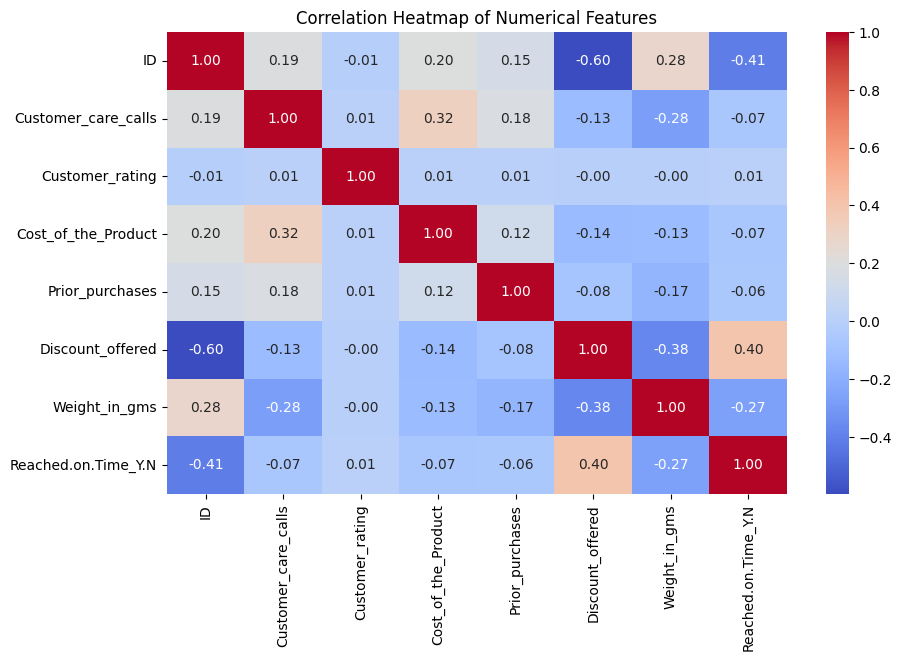

In [64]:
# Select only numerical columns
num_df = df.select_dtypes(include=["int64", "float64"])

# Plot correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(num_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Numerical Features")
plt.show()


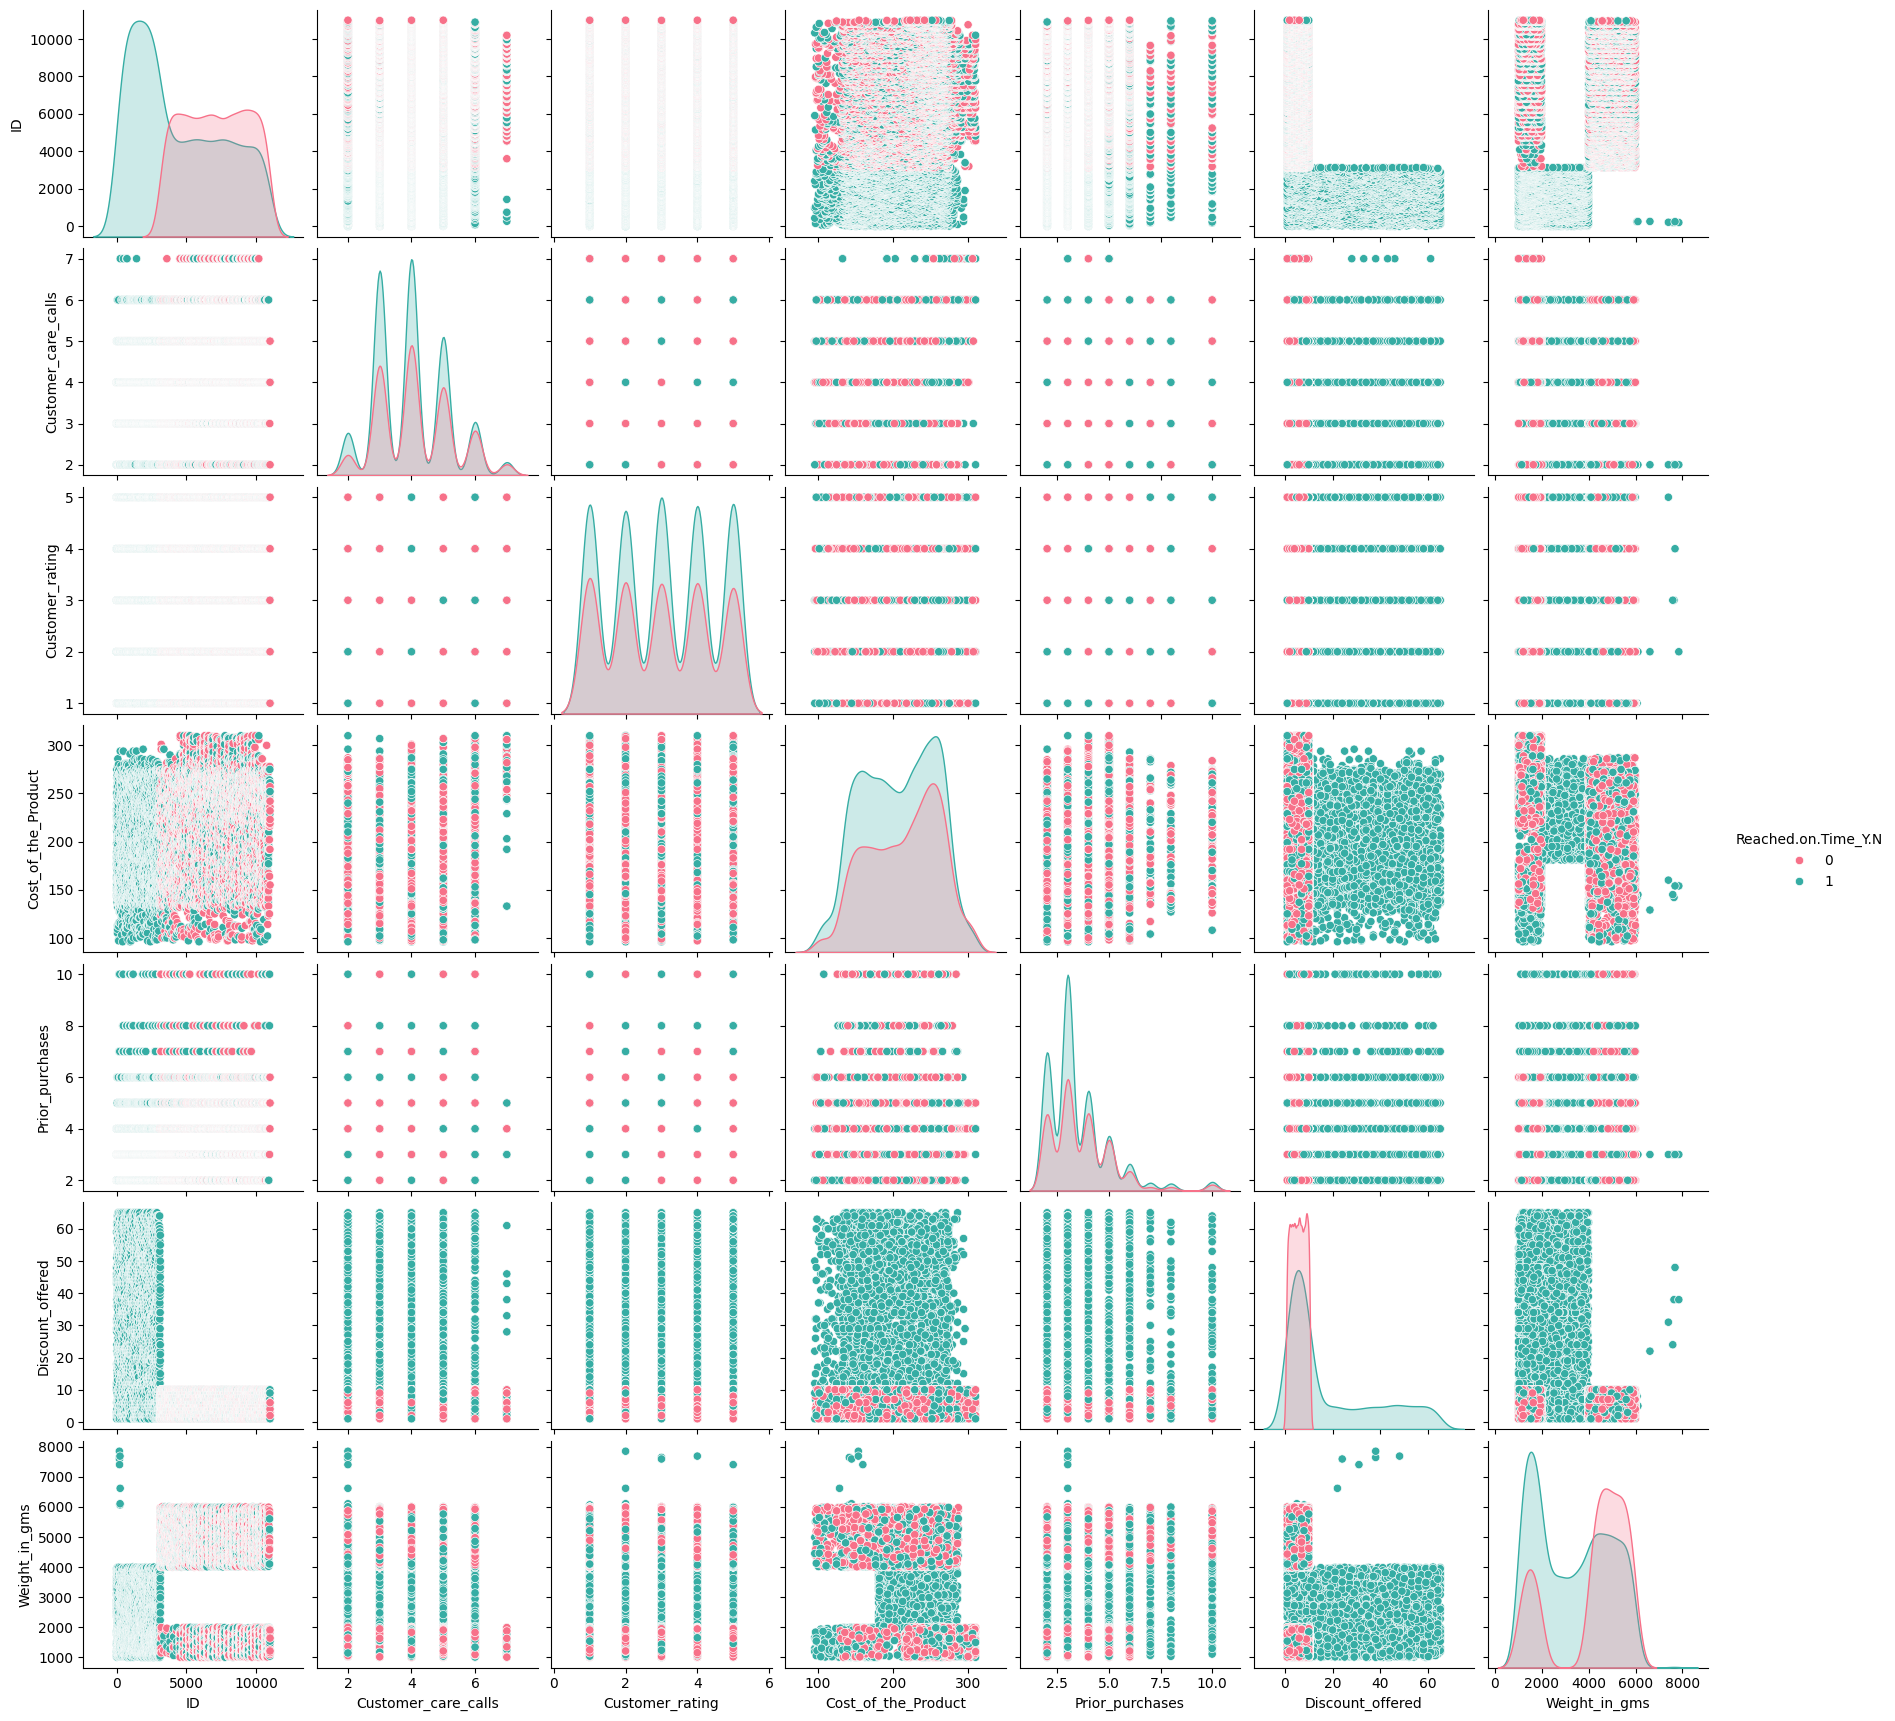

In [65]:
# Pairplot for numerical features with target as hue
sns.pairplot(df[num_cols + ["Reached.on.Time_Y.N"]], hue="Reached.on.Time_Y.N", palette="husl")
plt.show()

In [66]:
# ==================================
# 🔄 Encoding Categorical Columns
# ==================================

from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Step 1: Make a fresh copy to preserve original dataset
encoded_df = df.copy()

# Step 2: Encode ordinal categorical features using LabelEncoder
label_encoder = LabelEncoder()

for col in ['Product_importance', 'Gender']:
    encoded_df[col] = label_encoder.fit_transform(encoded_df[col])

# Step 3: Apply One-Hot Encoding to nominal categorical features
nominal_features = ['Warehouse_block', 'Mode_of_Shipment']
encoded_df = pd.get_dummies(encoded_df, columns=nominal_features, drop_first=True)

# Step 4: Preview the transformed data
print("✅ Encoding complete! Encoded dataset preview:")
encoded_df.head()


✅ Encoding complete! Encoded dataset preview:


,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,Warehouse_block_B,Warehouse_block_C,Warehouse_block_D,Warehouse_block_F,Mode_of_Shipment_Road,Mode_of_Shipment_Ship
0,1,4,2,177,3,1,0,44,1233,1,False,False,True,False,False,False
1,2,4,5,216,2,1,1,59,3088,1,False,False,False,True,False,False
2,3,2,2,183,4,1,1,48,3374,1,False,False,False,False,False,False
3,4,3,3,176,4,2,1,10,1177,1,True,False,False,False,False,False
4,5,2,2,184,3,2,0,46,2484,1,False,True,False,False,False,False


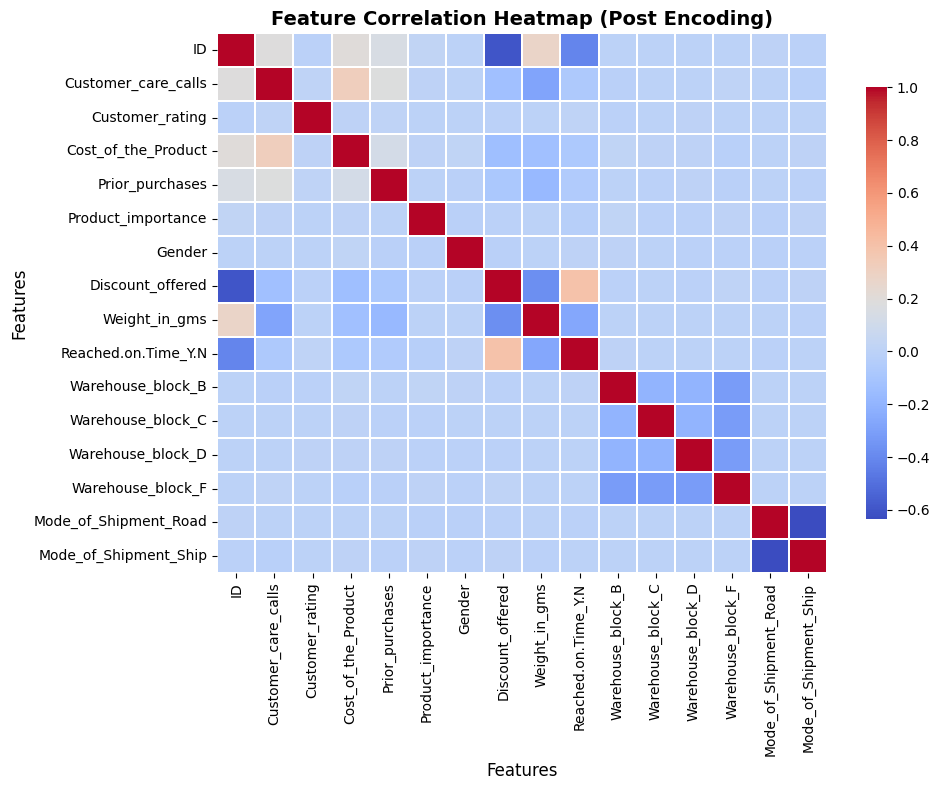

In [67]:
# Compute correlation matrix
corr_matrix = encoded_df.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(
    corr_matrix,
    cmap='coolwarm',
    annot=False,
    linewidths=0.3,
    cbar_kws={'shrink': 0.8}
)
plt.title("Feature Correlation Heatmap (Post Encoding)", fontsize=14, fontweight='bold')
plt.xlabel("Features", fontsize=12)
plt.ylabel("Features", fontsize=12)
plt.tight_layout()
plt.show()

In [68]:
# ===============================================================
# 🔍 Verify Encoded Columns and Convert Booleans to Numeric
# ===============================================================

# Step 1: Display only the transformed categorical features
encoded_preview_cols = ['Product_importance', 'Gender'] + [
    col for col in encoded_df.columns if ('Warehouse_block' in col) or ('Mode_of_Shipment' in col)
]

print("✅ Encoded feature columns preview:")
display(encoded_df[encoded_preview_cols].head())

# Step 2: Ensure all boolean columns are properly converted to integers (0/1)
encoded_df = encoded_df.astype(int)

print("\n✅ Data type normalization complete. Updated encoded dataset:")
encoded_df.head()


✅ Encoded feature columns preview:


,Product_importance,Gender,Warehouse_block_B,Warehouse_block_C,Warehouse_block_D,Warehouse_block_F,Mode_of_Shipment_Road,Mode_of_Shipment_Ship
0,1,0,False,False,True,False,False,False
1,1,1,False,False,False,True,False,False
2,1,1,False,False,False,False,False,False
3,2,1,True,False,False,False,False,False
4,2,0,False,True,False,False,False,False



✅ Data type normalization complete. Updated encoded dataset:


,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,Warehouse_block_B,Warehouse_block_C,Warehouse_block_D,Warehouse_block_F,Mode_of_Shipment_Road,Mode_of_Shipment_Ship
0,1,4,2,177,3,1,0,44,1233,1,0,0,1,0,0,0
1,2,4,5,216,2,1,1,59,3088,1,0,0,0,1,0,0
2,3,2,2,183,4,1,1,48,3374,1,0,0,0,0,0,0
3,4,3,3,176,4,2,1,10,1177,1,1,0,0,0,0,0
4,5,2,2,184,3,2,0,46,2484,1,0,1,0,0,0,0


In [69]:
# Initialize StandardScaler
std_scaler = StandardScaler()
# Columns to normalize
num_cols = ['Customer_care_calls', 'Customer_rating', 'Cost_of_the_Product',
            'Prior_purchases', 'Discount_offered', 'Weight_in_gms']

# Apply to numerical columns
std_scaled_data = encoded_df.copy()
std_scaled_data[num_cols] = std_scaler.fit_transform(encoded_df[num_cols])

# Check results
print(std_scaled_data[num_cols].describe())
import joblib

joblib.dump(std_scaler, 'scaler.pkl') 

print("✅ 'scaler.pkl' containing the fitted scaler saved successfully.")

       Customer_care_calls  Customer_rating  Cost_of_the_Product  \
count         1.099900e+04     1.099900e+04         1.099900e+04   
mean          2.273943e-16    -7.041473e-17        -1.653777e-16   
std           1.000045e+00     1.000045e+00         1.000045e+00   
min          -1.799887e+00    -1.408199e+00        -2.376077e+00   
25%          -9.237994e-01    -7.007551e-01        -8.571765e-01   
50%          -4.771132e-02     6.689172e-03         7.913188e-02   
75%           8.283768e-01     7.141334e-01         8.489855e-01   
max           2.580553e+00     1.421578e+00         2.076590e+00   

       Prior_purchases  Discount_offered  Weight_in_gms  
count     1.099900e+04      1.099900e+04   1.099900e+04  
mean     -2.067221e-17      4.134443e-17  -1.653777e-16  
std       1.000045e+00      1.000045e+00   1.000045e+00  
min      -1.029424e+00     -7.635530e-01  -1.610109e+00  
25%      -3.727348e-01     -5.784225e-01  -1.097360e+00  
50%      -3.727348e-01     -3.932921e-0

In [70]:
# Step 1: Derive the new feature
encoded_df['Cost_to_Weight_Ratio'] = (
    encoded_df['Cost_of_the_Product'] / encoded_df['Weight_in_gms']
)

# Step 2: Handle infinite and undefined values
encoded_df.replace([np.inf, -np.inf], np.nan, inplace=True)

# Step 3: Impute missing ratios with the median (robust against outliers)
median_ratio = encoded_df['Cost_to_Weight_Ratio'].median()
encoded_df['Cost_to_Weight_Ratio'].fillna(median_ratio, inplace=True)

print("✅ Feature 'Cost_to_Weight_Ratio' successfully created and cleaned.")

✅ Feature 'Cost_to_Weight_Ratio' successfully created and cleaned.


In [71]:

total_missing = encoded_df.isnull().sum().sum()
print(f"🧩 Any NaN values left? {total_missing}")


print("\n📊 'Cost_to_Weight_Ratio' Summary Statistics:\n")
print(encoded_df['Cost_to_Weight_Ratio'].describe().round(3))


print("\n✅ Final Encoded & Cleaned Dataset Preview:")
encoded_df.head()


🧩 Any NaN values left? 0

📊 'Cost_to_Weight_Ratio' Summary Statistics:

count    10999.000
mean         0.079
std          0.056
min          0.016
25%          0.040
50%          0.055
75%          0.103
max          0.309
Name: Cost_to_Weight_Ratio, dtype: float64

✅ Final Encoded & Cleaned Dataset Preview:


,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,Warehouse_block_B,Warehouse_block_C,Warehouse_block_D,Warehouse_block_F,Mode_of_Shipment_Road,Mode_of_Shipment_Ship,Cost_to_Weight_Ratio
0,1,4,2,177,3,1,0,44,1233,1,0,0,1,0,0,0,0.143552
1,2,4,5,216,2,1,1,59,3088,1,0,0,0,1,0,0,0.069948
2,3,2,2,183,4,1,1,48,3374,1,0,0,0,0,0,0,0.054238
3,4,3,3,176,4,2,1,10,1177,1,1,0,0,0,0,0,0.149533
4,5,2,2,184,3,2,0,46,2484,1,0,1,0,0,0,0,0.074074


In [72]:
# For target column
print("Target Variable (Reached.on.Time_Y.N):")
print(df['Reached.on.Time_Y.N'].value_counts())
print("\nNormalized Value Counts (Proportion):")
print(df['Reached.on.Time_Y.N'].value_counts(normalize=True))

Target Variable (Reached.on.Time_Y.N):
Reached.on.Time_Y.N
1    6563
0    4436
Name: count, dtype: int64

Normalized Value Counts (Proportion):
Reached.on.Time_Y.N
1    0.596691
0    0.403309
Name: proportion, dtype: float64


In [73]:

categorical_features = ['Warehouse_block', 'Mode_of_Shipment', 'Product_importance', 'Gender']

for feature in categorical_features:
    print(f"\n🔹 Feature: {feature}")
    print(df[feature].value_counts())

    print("\n📈 Normalized Distribution:")
    print(df[feature].value_counts(normalize=True).round(3))



🔹 Feature: Warehouse_block
Warehouse_block
F    3666
D    1834
A    1833
B    1833
C    1833
Name: count, dtype: int64

📈 Normalized Distribution:
Warehouse_block
F    0.333
D    0.167
A    0.167
B    0.167
C    0.167
Name: proportion, dtype: float64

🔹 Feature: Mode_of_Shipment
Mode_of_Shipment
Ship      7462
Flight    1777
Road      1760
Name: count, dtype: int64

📈 Normalized Distribution:
Mode_of_Shipment
Ship      0.678
Flight    0.162
Road      0.160
Name: proportion, dtype: float64

🔹 Feature: Product_importance
Product_importance
low       5297
medium    4754
high       948
Name: count, dtype: int64

📈 Normalized Distribution:
Product_importance
low       0.482
medium    0.432
high      0.086
Name: proportion, dtype: float64

🔹 Feature: Gender
Gender
F    5545
M    5454
Name: count, dtype: int64

📈 Normalized Distribution:
Gender
F    0.504
M    0.496
Name: proportion, dtype: float64


In [74]:
encoded_df.select_dtypes(include=['object']).columns
encoded_df.dtypes

ID                         int64
Customer_care_calls        int64
Customer_rating            int64
Cost_of_the_Product        int64
Prior_purchases            int64
Product_importance         int64
Gender                     int64
Discount_offered           int64
Weight_in_gms              int64
Reached.on.Time_Y.N        int64
Warehouse_block_B          int64
Warehouse_block_C          int64
Warehouse_block_D          int64
Warehouse_block_F          int64
Mode_of_Shipment_Road      int64
Mode_of_Shipment_Ship      int64
Cost_to_Weight_Ratio     float64
dtype: object

In [75]:
X = encoded_df.drop(columns=['ID','Reached.on.Time_Y.N'], axis=1)
y = encoded_df['Reached.on.Time_Y.N']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
# Further split training data into train + validation
X_train_sub, X_val, y_train_sub, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42, stratify=y_train)
# shape of the Training, testing dataset after splitting
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Training set shape: (8799, 15)
Testing set shape: (2200, 15)


In [76]:
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
models = {
    "Logistic Regression": LogisticRegression(C=0.5, max_iter=1000, random_state=42),  # L2 regularization (smaller C = stronger)

    "Decision Tree": DecisionTreeClassifier(max_depth=8, min_samples_split=10, min_samples_leaf=5, random_state=42),

    "Random Forest": RandomForestClassifier(n_estimators=200, max_depth=10, min_samples_split=10, min_samples_leaf=5, random_state=42, n_jobs=-1),

    "Naive Bayes": GaussianNB(),

    "KNN": KNeighborsClassifier(n_neighbors=9),

    "SVM": SVC(C=0.5, kernel='rbf', gamma='scale', random_state=42),

    "XGBoost": XGBClassifier(
        learning_rate=0.05, n_estimators=500, max_depth=6,subsample=0.8, colsample_bytree=0.8, reg_lambda=0.5, use_label_encoder=False, eval_metric='logloss', random_state=42),

    "LightGBM": LGBMClassifier(
        learning_rate=0.05, n_estimators=500, max_depth=6,num_leaves=20, subsample=0.8, colsample_bytree=0.8, reg_alpha=0.2, reg_lambda=0.5, random_state=42),

    "CatBoost": CatBoostClassifier(
        iterations=500, learning_rate=0.05, depth=6, l2_leaf_reg=5, verbose=False, random_state=42)
}

In [77]:
# ✅ Consistent preprocessing for CV
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), X_train.select_dtypes(exclude=['object']).columns),
    ('cat', OneHotEncoder(handle_unknown='ignore'), X_train.select_dtypes(include=['object']).columns)
])

results = []

for name, model in models.items():
    # ✅ Combine preprocessing + model
    pipe = Pipeline([
        ('preprocessor', preprocessor),
        ('model', model)
    ])

    # ✅ 10-fold cross-validation for accuracy
    cv_scores = cross_val_score(pipe, X_train, y_train, cv=cv, scoring='accuracy', n_jobs=-1)

    results.append({
        'Model': name,
        'Mean CV Accuracy': round(np.mean(cv_scores), 4),
        'Std Dev': round(np.std(cv_scores), 4)
    })

# ✅ Display results
results_df = pd.DataFrame(results).sort_values(by='Mean CV Accuracy', ascending=False)
print("\n🔍 Cross-validation results (Overfitting check):")
print(results_df)



🔍 Cross-validation results (Overfitting check):
                 Model  Mean CV Accuracy  Std Dev
2        Random Forest            0.6769   0.0100
1        Decision Tree            0.6726   0.0173
7             LightGBM            0.6610   0.0159
8             CatBoost            0.6588   0.0170
5                  SVM            0.6583   0.0117
3          Naive Bayes            0.6550   0.0055
6              XGBoost            0.6527   0.0171
0  Logistic Regression            0.6498   0.0087
4                  KNN            0.6329   0.0181


Class distribution before SMOTE: Counter({1: 5250, 0: 3549})
Class distribution after SMOTE: Counter({0: 5250, 1: 5250})


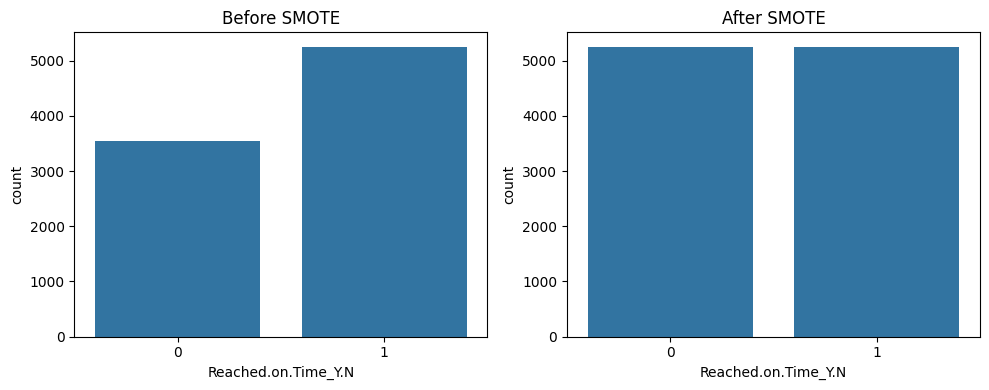

In [78]:
from imblearn.over_sampling import SMOTE
from collections import Counter

print("Class distribution before SMOTE:", Counter(y_train))

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print("Class distribution after SMOTE:", Counter(y_train_resampled))

fig, axes = plt.subplots(1, 2, figsize=(10, 4))
sns.countplot(x=y_train, ax=axes[0])
axes[0].set_title("Before SMOTE")
sns.countplot(x=y_train_resampled, ax=axes[1])
axes[1].set_title("After SMOTE")
plt.tight_layout()
plt.show()


In [79]:
# Fix random seed for consistency
RND = 42
# Define cross-validation strategy
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=RND)
# Define models with anti-overfitting hyperparameters
models = {
    "Logistic Regression": LogisticRegression(C=0.1, penalty='l2', solver='liblinear', random_state=RND),
    "Decision Tree": DecisionTreeClassifier(max_depth=6, min_samples_split=10, min_samples_leaf=4, random_state=RND),
    "Random Forest": RandomForestClassifier(n_estimators=200, max_depth=10, min_samples_split=5, 
                                            min_samples_leaf=3, max_features='sqrt', random_state=RND),
    "KNN": KNeighborsClassifier(n_neighbors=15),
    "Naive Bayes": GaussianNB(),
    "SVM": SVC(C=0.5, kernel='rbf', gamma='scale', random_state=RND),
    "XGBoost": XGBClassifier(max_depth=4, learning_rate=0.05, subsample=0.8, colsample_bytree=0.8,
                             reg_lambda=1, n_estimators=200, random_state=RND, eval_metric='logloss', use_label_encoder=False),
    "LightGBM": LGBMClassifier(num_leaves=20, max_depth=6, subsample=0.8, reg_lambda=0.5,
                               learning_rate=0.05, n_estimators=200, random_state=RND),
    "CatBoost": CatBoostClassifier(depth=6, learning_rate=0.05, l2_leaf_reg=3, n_estimators=200,
                                   verbose=0, random_state=RND)
}

In [80]:
# Run cross-validation to check improvement
cv_results = []
for name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='accuracy')

    cv_results.append({
        "Model": name,
        "Mean CV Accuracy": np.mean(scores),
        "Std Dev": np.std(scores)
    })

[LightGBM] [Info] Number of positive: 4725, number of negative: 3194
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000167 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 831
[LightGBM] [Info] Number of data points in the train set: 7919, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.596666 -> initscore=0.391594
[LightGBM] [Info] Start training from score 0.391594
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -in

In [81]:
# Display results
cv_df = pd.DataFrame(cv_results).sort_values(by="Mean CV Accuracy", ascending=False)
print("\nCross-validation results (After Regularization to Fix Overfitting):")
print(cv_df.to_string(index=False))


Cross-validation results (After Regularization to Fix Overfitting):
              Model  Mean CV Accuracy  Std Dev
      Decision Tree          0.682463 0.015005
      Random Forest          0.675532 0.009383
            XGBoost          0.671441 0.009773
           CatBoost          0.666439 0.015332
           LightGBM          0.664962 0.014766
                KNN          0.657800 0.015585
                SVM          0.656781 0.011183
        Naive Bayes          0.654279 0.004940
Logistic Regression          0.640416 0.012924


In [82]:
models = {
    "Logistic Regression": LogisticRegression(C=0.5, max_iter=1000, random_state=42),
    "Decision Tree": DecisionTreeClassifier(max_depth=8, min_samples_split=10, min_samples_leaf=5, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=200, max_depth=10, min_samples_split=10, min_samples_leaf=5, random_state=42, n_jobs=-1),
    "Naive Bayes": GaussianNB(),
    "KNN": KNeighborsClassifier(n_neighbors=9),
    "SVM": SVC(C=0.5, kernel='rbf', gamma='scale', probability=True, random_state=42),
    "XGBoost": XGBClassifier(
        learning_rate=0.05, n_estimators=500, max_depth=6,
        subsample=0.8, colsample_bytree=0.8, reg_lambda=0.5,
        use_label_encoder=False, eval_metric='logloss', random_state=42),
    "LightGBM": LGBMClassifier(
        learning_rate=0.05, n_estimators=500, max_depth=6, num_leaves=20,
        subsample=0.8, colsample_bytree=0.8, reg_alpha=0.2, reg_lambda=0.5, random_state=42),
    "CatBoost": CatBoostClassifier(
        iterations=500, learning_rate=0.05, depth=6, l2_leaf_reg=5, verbose=False, random_state=42)
}


Training and Evaluating: Logistic Regression
----------------------------------------------------------------------

Classification Report:
              precision    recall  f1-score   support

           0       0.55      0.60      0.57       710
           1       0.71      0.67      0.69      1050

    accuracy                           0.64      1760
   macro avg       0.63      0.63      0.63      1760
weighted avg       0.64      0.64      0.64      1760



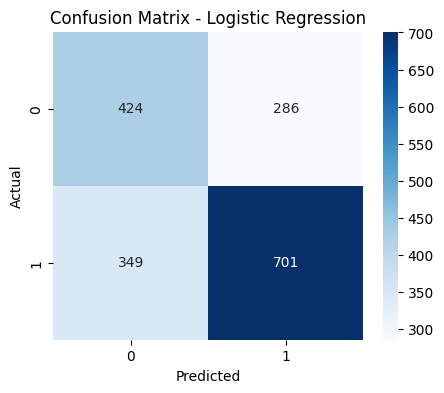

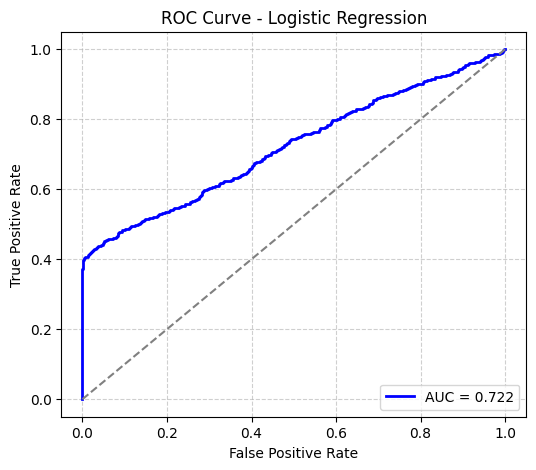


Training and Evaluating: Decision Tree
----------------------------------------------------------------------

Classification Report:
              precision    recall  f1-score   support

           0       0.58      0.93      0.72       710
           1       0.92      0.54      0.68      1050

    accuracy                           0.70      1760
   macro avg       0.75      0.74      0.70      1760
weighted avg       0.78      0.70      0.70      1760



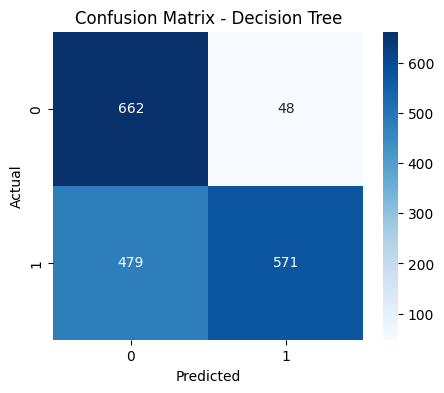

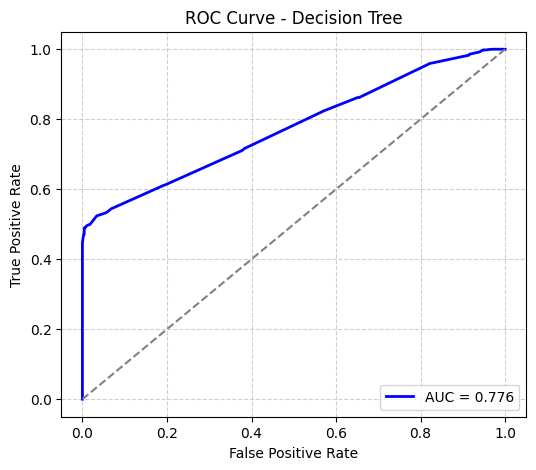


Training and Evaluating: Random Forest
----------------------------------------------------------------------

Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.97      0.78       710
           1       0.97      0.64      0.77      1050

    accuracy                           0.77      1760
   macro avg       0.81      0.80      0.77      1760
weighted avg       0.84      0.77      0.77      1760



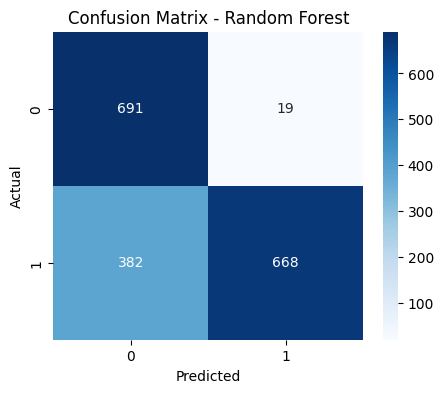

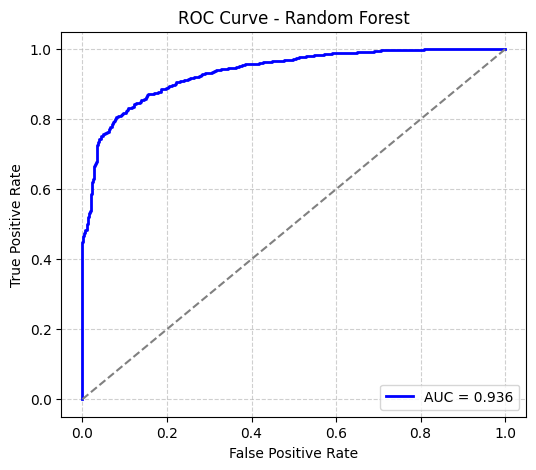


Training and Evaluating: Naive Bayes
----------------------------------------------------------------------

Classification Report:
              precision    recall  f1-score   support

           0       0.53      0.98      0.69       710
           1       0.97      0.42      0.59      1050

    accuracy                           0.65      1760
   macro avg       0.75      0.70      0.64      1760
weighted avg       0.80      0.65      0.63      1760



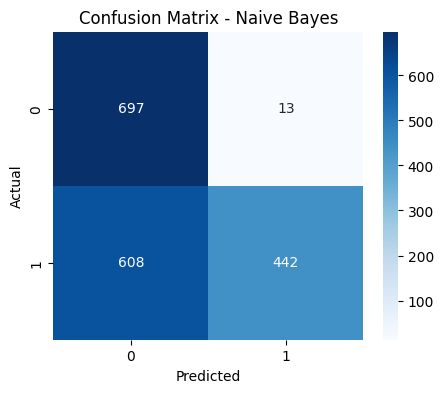

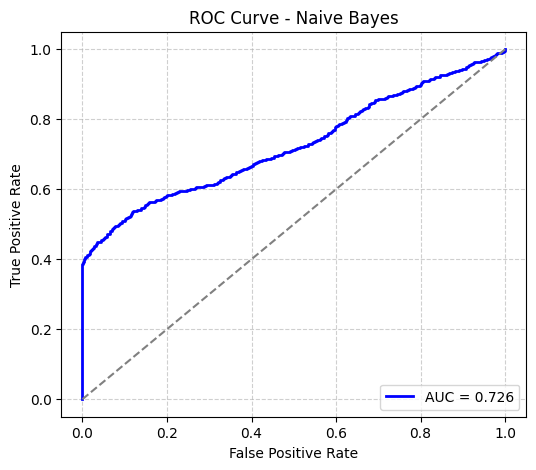


Training and Evaluating: KNN
----------------------------------------------------------------------

Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.75      0.70       710
           1       0.82      0.74      0.78      1050

    accuracy                           0.74      1760
   macro avg       0.74      0.75      0.74      1760
weighted avg       0.75      0.74      0.75      1760



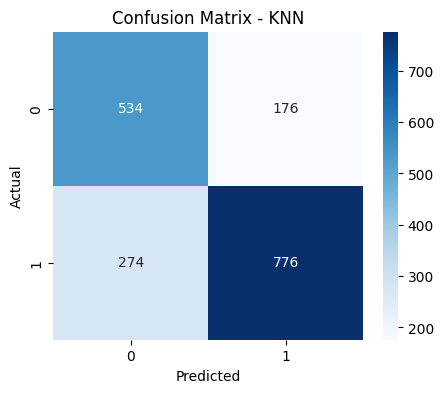

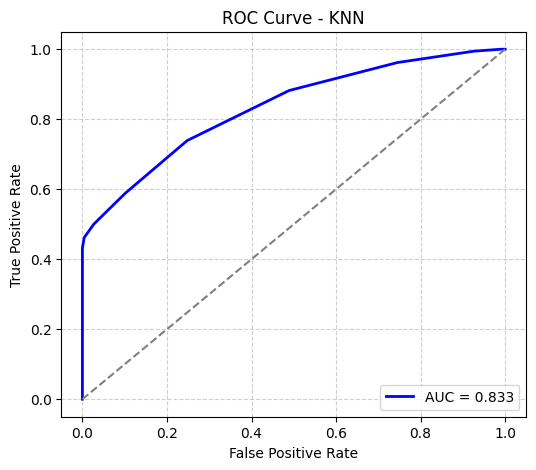


Training and Evaluating: SVM
----------------------------------------------------------------------

Classification Report:
              precision    recall  f1-score   support

           0       0.56      0.60      0.58       710
           1       0.72      0.68      0.70      1050

    accuracy                           0.65      1760
   macro avg       0.64      0.64      0.64      1760
weighted avg       0.66      0.65      0.65      1760



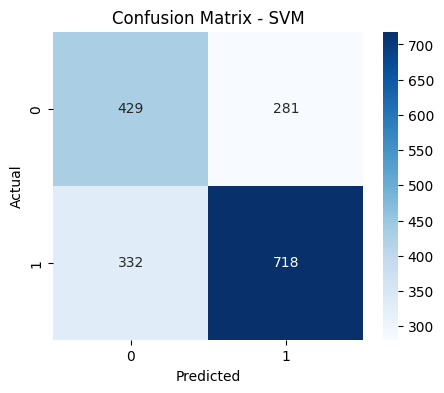

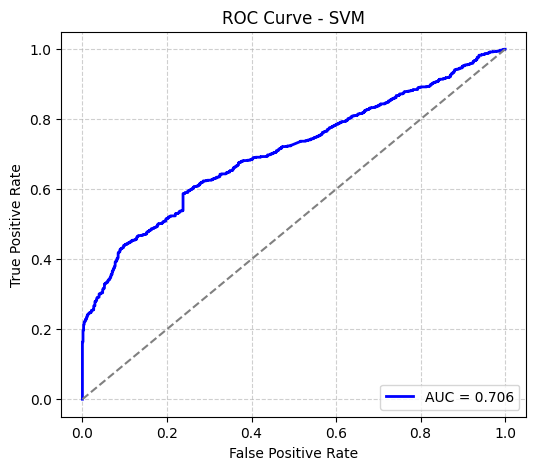


Training and Evaluating: XGBoost
----------------------------------------------------------------------

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.97      0.92       710
           1       0.98      0.91      0.94      1050

    accuracy                           0.93      1760
   macro avg       0.93      0.94      0.93      1760
weighted avg       0.94      0.93      0.93      1760



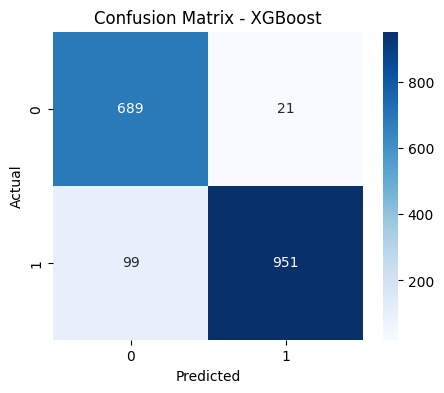

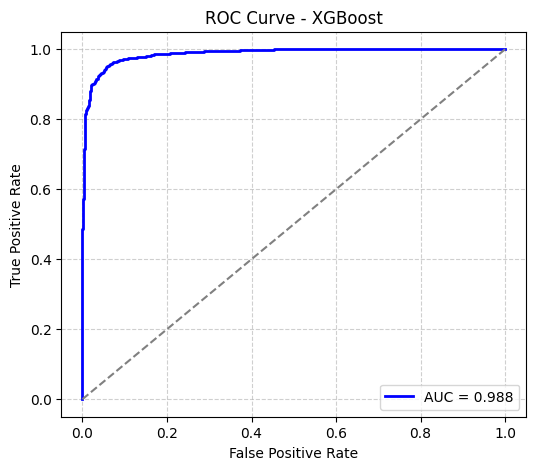


Training and Evaluating: LightGBM
----------------------------------------------------------------------
[LightGBM] [Info] Number of positive: 5250, number of negative: 3549
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002085 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 831
[LightGBM] [Info] Number of data points in the train set: 8799, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.596659 -> initscore=0.391562
[LightGBM] [Info] Start training from score 0.391562
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further

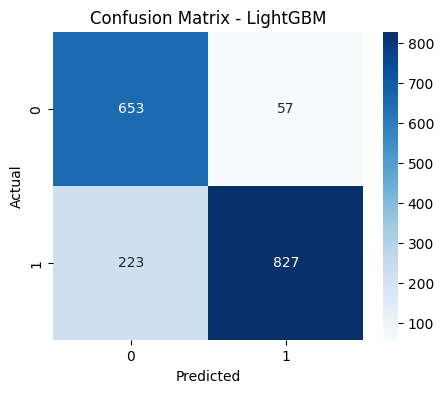

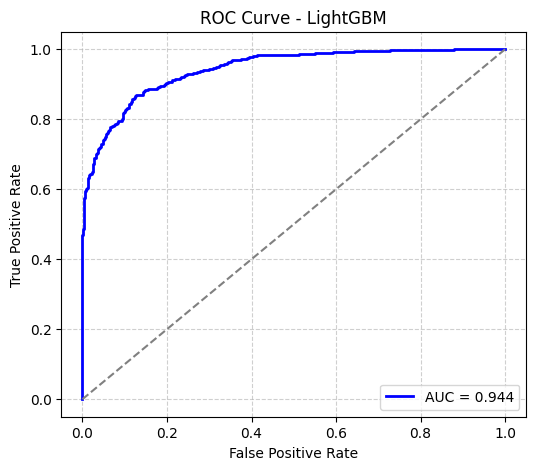


Training and Evaluating: CatBoost
----------------------------------------------------------------------

Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.93      0.81       710
           1       0.94      0.76      0.84      1050

    accuracy                           0.83      1760
   macro avg       0.83      0.84      0.83      1760
weighted avg       0.85      0.83      0.83      1760



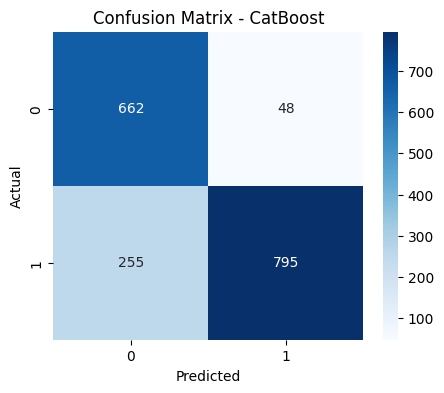

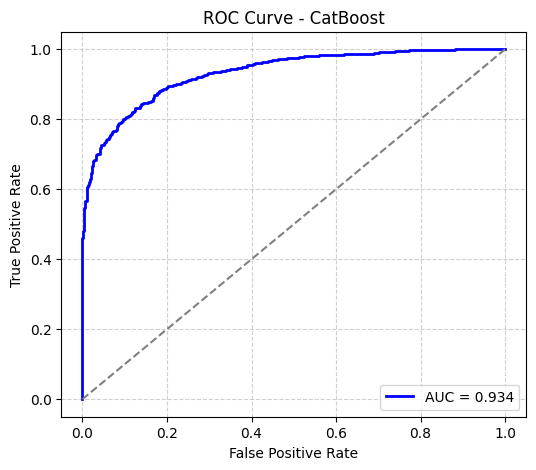

In [83]:
comparison = []

for name, model in models.items():
    print(f"\nTraining and Evaluating: {name}")
    print("-" * 70)

    # Train model
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    y_prob = model.predict_proba(X_val)[:, 1]

    # Metrics
    acc = accuracy_score(y_val, y_pred)
    prec = precision_score(y_val, y_pred)
    rec = recall_score(y_val, y_pred)
    f1 = f1_score(y_val, y_pred)
    roc_auc = roc_auc_score(y_val, y_prob)


    print("\nClassification Report:")
    print(classification_report(y_val, y_pred))


    plt.figure(figsize=(5,4))
    sns.heatmap(pd.crosstab(y_val, y_pred), annot=True, fmt='d', cmap='Blues')
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    fpr, tpr, _ = roc_curve(y_val, y_prob)
    plt.figure(figsize=(6,5))
    plt.plot(fpr, tpr, color='blue', lw=2, label=f"AUC = {roc_auc:.3f}")
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
    plt.title(f"ROC Curve - {name}")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend(loc="lower right")
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()

    # Store Results
    comparison.append({
        "Model": name,
        "Accuracy": round(acc, 4),
        "Precision": round(prec, 4),
        "Recall": round(rec, 4),
        "F1 Score": round(f1, 4),
        "ROC-AUC": round(roc_auc, 4)
    })

In [84]:
# --- Final Comparison Table ---
comparison_df = pd.DataFrame(comparison).sort_values(by='ROC-AUC', ascending=False)
print("\nFinal Model Comparison Table:")
print(comparison_df)


Final Model Comparison Table:
                 Model  Accuracy  Precision  Recall  F1 Score  ROC-AUC
6              XGBoost    0.9318     0.9784  0.9057    0.9407   0.9876
7             LightGBM    0.8409     0.9355  0.7876    0.8552   0.9440
2        Random Forest    0.7722     0.9723  0.6362    0.7691   0.9359
8             CatBoost    0.8278     0.9431  0.7571    0.8399   0.9335
4                  KNN    0.7443     0.8151  0.7390    0.7752   0.8329
1        Decision Tree    0.7006     0.9225  0.5438    0.6842   0.7758
3          Naive Bayes    0.6472     0.9714  0.4210    0.5874   0.7263
0  Logistic Regression    0.6392     0.7102  0.6676    0.6883   0.7221
5                  SVM    0.6517     0.7187  0.6838    0.7008   0.7062


In [87]:
# ----- Compute and save an optimal decision threshold (optional but fixes "always 1") -----
from sklearn.metrics import precision_recall_curve
import joblib
import numpy as np

# Probabilities for the positive class (On Time = 1)
y_prob = model.predict_proba(X_val)[:, 1]

# Compute precision–recall curve for class 1
precision, recall, thresholds = precision_recall_curve(y_val, y_prob)

# Compute F1 scores for each threshold
f1_scores = (2 * precision * recall) / (precision + recall + 1e-12)

# Pick threshold that maximizes F1 for class 1
best_idx = np.nanargmax(f1_scores[:-1])
best_threshold_for_class1 = thresholds[best_idx]

print(f"Optimal threshold for Class 1 (On Time) = {best_threshold_for_class1:.3f}")
joblib.dump(best_threshold_for_class1, "decision_threshold_class1.pkl")


Optimal threshold for Class 1 (On Time) = 0.440


['decision_threshold_class1.pkl']

In [88]:
import joblib
model = joblib.load("xgboost_shipment_model.pkl")
print("Model classes order:", model.classes_)


Model classes order: [0 1]


In [90]:
import pandas as pd
import joblib
import numpy as np

# --- Load model, scaler, and threshold ---
model = joblib.load("xgboost_shipment_model.pkl")
scaler = joblib.load("scaler.pkl")
threshold_class1 = joblib.load("decision_threshold_class1.pkl")

# --- Test input (ID 8730) ---
test = pd.DataFrame({
    'Warehouse_block': ['F'],
    'Mode_of_Shipment': ['Ship'],
    'Customer_care_calls': [4],
    'Customer_rating': [4],
    'Cost_of_the_Product': [239],
    'Prior_purchases': [3],
    'Product_importance': ['medium'],
    'Gender': ['M'],
    'Discount_offered': [6],
    'Weight_in_gms': [5632]
})

# --- Step 1: Encode categorical features ---
test['Product_importance'] = test['Product_importance'].map({'low': 1, 'medium': 2, 'high': 0})
test['Gender'] = test['Gender'].map({'F': 0, 'M': 1})
test = pd.get_dummies(test, columns=['Warehouse_block', 'Mode_of_Shipment'], drop_first=True)

# --- Step 2: Feature engineering ---
test['Cost_to_Weight_Ratio'] = test['Cost_of_the_Product'] / test['Weight_in_gms']
test.replace([np.inf, -np.inf], np.nan, inplace=True)
test['Cost_to_Weight_Ratio'].fillna(0.079, inplace=True)

# --- Step 3: Ensure exact feature order ---
expected_cols = [
    'Customer_care_calls', 
    'Customer_rating', 
    'Cost_of_the_Product', 
    'Prior_purchases', 
    'Product_importance', 
    'Gender',             
    'Discount_offered',   
    'Weight_in_gms',      
    'Warehouse_block_B', 
    'Warehouse_block_C',
    'Warehouse_block_D', 
    'Warehouse_block_F',
    'Mode_of_Shipment_Road', 
    'Mode_of_Shipment_Ship', 
    'Cost_to_Weight_Ratio'
]

for col in expected_cols:
    if col not in test.columns:
        test[col] = 0

test = test[expected_cols]

# --- Step 4: Scale numeric columns ---
num_cols = ['Customer_care_calls', 'Customer_rating', 'Cost_of_the_Product',
            'Prior_purchases', 'Discount_offered', 'Weight_in_gms']
test[num_cols] = scaler.transform(test[num_cols])
test[num_cols] = test[num_cols].astype(float)

# --- Step 5: Predict ---
proba = model.predict_proba(test)[0]
prob_not_on_time = proba[0]  # class 0
prob_on_time = proba[1]      # class 1

# --- Step 6: Decision ---
if prob_not_on_time >= (1 - threshold_class1):
    prediction = 0  # Not On Time
else:
    prediction = 1  # On Time

print("🔍 Prediction result:")
print(f"Prediction: {'ON TIME (1)' if prediction == 1 else 'NOT ON TIME (0)'}")
print(f"Probability (On Time): {prob_on_time * 100:.2f}%")
print(f"Probability (Not On Time): {prob_not_on_time * 100:.2f}%")
print(f"Threshold used: {threshold_class1:.2f}")


🔍 Prediction result:
Prediction: ON TIME (1)
Probability (On Time): 79.42%
Probability (Not On Time): 20.58%
Threshold used: 0.44
